In [3]:
import numpy as np
import pandas as pd
import statsrat as sr
from statsrat import rw
from statsrat.expr.predef.cat import fast
import read_fast_surveys as rfs
from pseudo_guid_list import pguid
import seaborn as sns

            min   max  default
eta0        0.0  10.0      1.0
lrate       0.0   1.0      0.2
lrate_atn   0.0   2.0      0.2
metric      0.1  10.0      2.0
resp_scale  0.0  10.0      1.0
angry


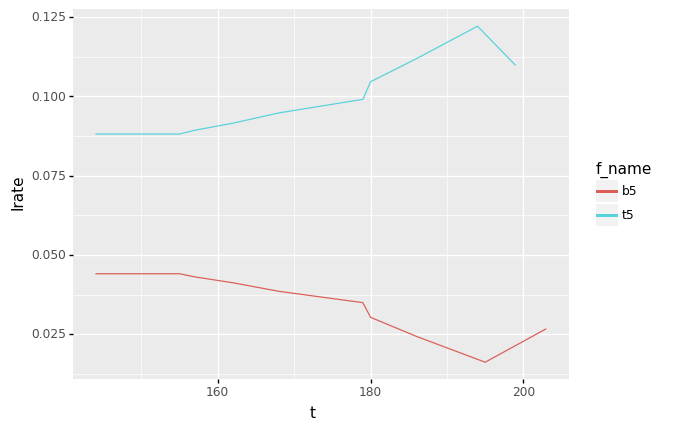

<ggplot: (304727643)>

In [48]:
# Indicate whether data import should be tested for debugging purposes.
test_import = False

# Indicate whether the learning model should be fit.
fit_model = True

# Define learning model.
fit_model = rw.model(name = 'CompAct_eta0',
                        fbase = rw.fbase.elem,
                        fweight = rw.fweight.from_aux_norm,
                        lrate = rw.lrate.from_aux_norm,
                        aux = rw.aux.gradcomp_eta0)

trials = fast.make_trials()
print(fit_model.pars)
foo = fit_model.simulate(trials, par_val = [0.5, 0.2, 0.9, 0.8, 1])
x_dims = trials.attrs['x_dims']
bar = list(x_dims.keys())
bar.sort()
print(bar[0])

# Define time limit for model fitting (in old R code was Inf, but is 10 by default in current code).
max_time = 30

sr.learn_plot(foo, var = 'lrate', sel = {'f_name': ['t5', 'b5'], 'u_name': 'cat1'}, drop_zeros = True)

In [3]:
# Test import of in lab data
if test_import:
    path = 'debug_data_inlab'
    (ds_fall2020_inlab, summary_fall2020_inlab) = fast.read_csv(path = path,
                                                                x_col = ['cue1', 'cue2'],
                                                                resp_col = ['trial_resp.keys', 'test_resp.keys'],
                                                                resp_map = {'h' : 'cati', 'g' : 'catii', 'c' : 'cat1', 'm' : 'cat2', 's' : 'cat3', 'r' : 'cat4'},
                                                                ident_col = 'participant',
                                                                conf_col = 'conf_rating.response',
                                                                other_info = {'age': ('questionText', 'What is your age?', 'slider.response'),
                                                                              'sex': ('questionText', 'What was your biological sex assigned at birth?', 'slider.response'),
                                                                              'latinx': ('questionText', 'Do you consider yourself to be of Hispanic, Latino, or Spanish origin?', 'slider.response'),
                                                                              'race': ('questionText', 'With which racial group do you most closely identify?', 'slider.response'),
                                                                              'employment': ('questionText', 'What is your current employment status?', 'slider.response')},
                                                               n_final = 8)
    # Import survey data.
    foo = rfs.read_surveys(path = path,
                           fun = rfs.process_psychopy,
                           ident_col = 'participant')

    # Only keep people whose surveys can be read.
    index = summary_fall2020_inlab.index.isin(foo.index.values)
    ds_fall2020_inlab = ds_fall2020_inlab[{'ident': index}]

    if fit_model:
        # Fit model.
        bar = sr.fit_indv(model = fit_model,
                          ds = ds_fall2020_inlab,
                          max_time = max_time)
        # Concatenate data frames.
        summary_fall2020_inlab = pd.concat([summary_fall2020_inlab.loc[index], foo, bar], axis = 1)
    else:
        # Concatenate data frames.
        summary_fall2020_inlab = pd.concat([summary_fall2020_inlab.loc[index], foo], axis = 1)
    print(summary_fall2020_inlab)

In [4]:
# Test import of online data
if test_import:
    path = 'debug_data_online'
    (ds_fall2020_online, summary_fall2020_online) = fast.read_csv(path = path,
                                                                  x_col = ['abstract_stim1', 'abstract_stim2'],
                                                                  resp_col = ['response'],
                                                                  resp_map = {'h' : 'cati', 'g' : 'catii', 'l' : 'cat1', 'o' : 'cat2', 's' : 'cat3', 'r' : 'cat4'},
                                                                  ident_col = None,
                                                                  other_info = {'age': ('head', 'What is your age?', 'response'),
                                                                                'sex': ('head', 'What was your biological sex assigned at birth?', 'response'),
                                                                                'latinx': ('head', 'Do you consider yourself to be Hispanic, Latino, or of Spanish origin?', 'response'),
                                                                                'race': ('head', 'With which racial group do you identify (select the one with which you MOST CLOSELY identify)?', 'response'),
                                                                                'employment': ('head', 'What is your current employment status?', 'response')},
                                                                  header = 2,
                                                                  n_final = 8)
    # Import survey data.
    foo = rfs.read_surveys(path = path,
                           fun = rfs.process_testable,
                           ident_col = None,
                           header = 2)

    # Only keep people whose surveys can be read.
    index = summary_fall2020_online.index.isin(foo.index.values)
    ds_fall2020_online = ds_fall2020_online[{'ident': index}]

    if fit_model:
        # Fit model.
        bar = sr.fit_indv(model = fit_model,
                          ds = ds_fall2020_online,
                          max_time = max_time)
        # Concatenate data frames.
        summary_fall2020_online = pd.concat([summary_fall2020_online.loc[index], foo, bar], axis = 1)
    else:
        # Concatenate data frames.
        summary_fall2020_online = pd.concat([summary_fall2020_online.loc[index], foo], axis = 1)
    print(summary_fall2020_online)

In [5]:
# Import data collected in the lab (using Psychopy).

if not test_import:
    path = 'fast_data_inlab'

    # Import trial by trial task data.
    (ds_fall2020_inlab, summary_fall2020_inlab) = fast.read_csv(path = path,
                                                                x_col = ['cue1', 'cue2'],
                                                                resp_col = ['trial_resp.keys', 'test_resp.keys'],
                                                                resp_map = {'h' : 'cati', 'g' : 'catii', 'c' : 'cat1', 'm' : 'cat2', 's' : 'cat3', 'r' : 'cat4'},
                                                                ident_col = 'participant',
                                                                #conf_col = 'conf_rating.response', # INCLUDE CONFIDENCE RATINGS IN OAT SCORES.
                                                                other_info = {'age': ('questionText', 'What is your age?', 'slider.response'),
                                                                              'sex': ('questionText', 'What was your biological sex assigned at birth?', 'slider.response'),
                                                                              'latinx': ('questionText', 'Do you consider yourself to be of Hispanic, Latino, or Spanish origin?', 'slider.response'),
                                                                              'race': ('questionText', 'With which racial group do you most closely identify?', 'slider.response'),
                                                                              'employment': ('questionText', 'What is your current employment status?', 'slider.response')},
                                                               n_final = 8)

    # Import survey data.
    foo = rfs.read_surveys(path = path,
                           fun = rfs.process_psychopy,
                           ident_col = 'participant')

    # Only keep people whose surveys can be read.
    index = summary_fall2020_inlab.index.isin(foo.index.values)
    ds_fall2020_inlab = ds_fall2020_inlab[{'ident': index}]

    if fit_model:
        # Fit model.
        bar = sr.fit_indv(model = fit_model,
                          ds = ds_fall2020_inlab,
                          max_time = max_time)
        # Concatenate data frames.
        summary_fall2020_inlab = pd.concat([summary_fall2020_inlab.loc[index], foo, bar], axis = 1)
    else:
        # Concatenate data frames.
        summary_fall2020_inlab = pd.concat([summary_fall2020_inlab.loc[index], foo], axis = 1)
    print(summary_fall2020_inlab)

0
['cue1', 'cue2']
['cue1', 'cue2']
['cue1', 'cue2']
['cue1', 'cue2']
0
The following files could not be read by Pandas:
fast_data_inlab/_fall_faces_2020_Oct_12_1324.csv
fast_data_inlab/NDARGR305EJL_fall_faces_2020_Sep_17_1210.csv
fast_data_inlab/_fall_faces_2020_Oct_16_1602.csv
fast_data_inlab/_fall_faces_2020_Sep_21_1338.csv
Participant ID (ident) could not be read from the following files:
fast_data_inlab/_fall_faces_2020_Nov_03_1003.csv
fast_data_inlab/_fall_faces_2020_Oct_22_1217.csv
0
'anx_slider1.response'
'anx_slider1.response'
'anx_slider1.response'
'anx_slider1.response'
'anx_slider1.response'
0
Fitting 1 of 127 (0.8%)
Fitting 2 of 127 (1.6%)
Fitting 3 of 127 (2.4%)
Fitting 4 of 127 (3.1%)
Fitting 5 of 127 (3.9%)
Fitting 6 of 127 (4.7%)
Fitting 7 of 127 (5.5%)
Fitting 8 of 127 (6.3%)
Fitting 9 of 127 (7.1%)
Fitting 10 of 127 (7.9%)
Fitting 11 of 127 (8.7%)
Fitting 12 of 127 (9.4%)
Fitting 13 of 127 (10.2%)
Fitting 14 of 127 (11.0%)
Fitting 15 of 127 (11.8%)
Fitting 16 of 127 

In [6]:
# Import online data (collected using Testable).

# IMPORTANT NOTE: Many data files have missing confidence ratings, but are otherwise readable.
# THERE MUST BE SOME FLAW IN THE CURRENT TESTABLE CODE.

# DOES NOT INCLUDE CONFIDENCE RATINGS IN OAT SCORES.

if not test_import:
    path = 'fast_data_online'
    # Import trial by trial task data.
    (ds_fall2020_online, summary_fall2020_online) = fast.read_csv(path = path,
                                                                  x_col = ['abstract_stim1', 'abstract_stim2'],
                                                                  resp_col = ['response'],
                                                                  resp_map = {'h' : 'cati', 'g' : 'catii', 'l' : 'cat1', 'o' : 'cat2', 's' : 'cat3', 'r' : 'cat4'},
                                                                  ident_col = None,
                                                                  other_info = {'age': ('head', 'What is your age?', 'response'),
                                                                                'sex': ('head', 'What was your biological sex assigned at birth?', 'response'),
                                                                                'latinx': ('head', 'Do you consider yourself to be Hispanic, Latino, or of Spanish origin?', 'response'),
                                                                                'race': ('head', 'With which racial group do you identify (select the one with which you MOST CLOSELY identify)?', 'response'),
                                                                                'employment': ('head', 'What is your current employment status?', 'response')},
                                                                  header = 2,
                                                                  n_final = 8)
    # Import survey data.
    foo = rfs.read_surveys(path = path,
                           fun = rfs.process_testable,
                           ident_col = None,
                           header = 2)

    # Only keep people whose surveys can be read.
    index = summary_fall2020_online.index.isin(foo.index.values)
    ds_fall2020_online = ds_fall2020_online[{'ident': index}]

    if fit_model:
        # Fit model.
        bar = sr.fit_indv(model = fit_model,
                          ds = ds_fall2020_online,
                          max_time = max_time)
        # Concatenate data frames.
        summary_fall2020_online = pd.concat([summary_fall2020_online.loc[index], foo, bar], axis = 1)
    else:
        # Concatenate data frames.
        summary_fall2020_online = pd.concat([summary_fall2020_online.loc[index], foo], axis = 1)
    print(summary_fall2020_online)

['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
['abstract_stim1', 'abstract_stim2']
The following files could not be read by Pandas:
fast_data_online/666579_201125_124958.csv
fast_data_online/666579_201204_055950.csv
fast_data_online/666579_201204_054131.csv
fast_data_online/666579_201201_013309.csv
fast_data_online/666579_201202_092221.csv
fast_data_online/666579_201203_214645.csv
fast_data_online/666579_201129_225628.csv
fast_data_online/666579_2011

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

'DataFrame' object has no attribute 'responseRows'


b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'


b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'


b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

'DataFrame' object has no attribute 'responseRows'


b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

'DataFrame' object has no attribute 'responseRows'


b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'


b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

88.0
'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'
76.0


b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

'DataFrame' object has no attribute 'responseRows'
'DataFrame' object has no attribute 'responseRows'


b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

Fitting 1 of 168 (0.6%)
Fitting 2 of 168 (1.2%)
Fitting 3 of 168 (1.8%)
Fitting 4 of 168 (2.4%)
Fitting 5 of 168 (3.0%)
Fitting 6 of 168 (3.6%)
Fitting 7 of 168 (4.2%)
Fitting 8 of 168 (4.8%)
Fitting 9 of 168 (5.4%)
Fitting 10 of 168 (6.0%)
Fitting 11 of 168 (6.5%)
Fitting 12 of 168 (7.1%)
Fitting 13 of 168 (7.7%)
Fitting 14 of 168 (8.3%)
Fitting 15 of 168 (8.9%)
Fitting 16 of 168 (9.5%)
Fitting 17 of 168 (10.1%)
Fitting 18 of 168 (10.7%)
Fitting 19 of 168 (11.3%)
Fitting 20 of 168 (11.9%)
Fitting 21 of 168 (12.5%)
Fitting 22 of 168 (13.1%)
Fitting 23 of 168 (13.7%)
Fitting 24 of 168 (14.3%)
Fitting 25 of 168 (14.9%)
Fitting 26 of 168 (15.5%)
Fitting 27 of 168 (16.1%)
Fitting 28 of 168 (16.7%)
Fitting 29 of 168 (17.3%)
Fitting 30 of 168 (17.9%)
Fitting 31 of 168 (18.5%)
Fitting 32 of 168 (19.0%)
Fitting 33 of 168 (19.6%)
Fitting 34 of 168 (20.2%)
Fitting 35 of 168 (20.8%)
Fitting 36 of 168 (21.4%)
Fitting 37 of 168 (22.0%)
Fitting 38 of 168 (22.6%)
Fitting 39 of 168 (23.2%)
Fitting 40 

In [7]:
# ***** COMBINE DATA FRAMES AND FIX/ADD COLUMNS *****

# Combine online and in lab summary data.
foo = summary_fall2020_inlab
foo['source'] = 'inlab'
bar = summary_fall2020_online
bar['source'] = 'online'
summary_fall2020 = pd.concat([foo, bar], axis = 0)
summary_fall2020['avg_last8_pct_correct'] = (summary_fall2020['tutorial_0c_last8_pct_correct'] + summary_fall2020['training_last8_pct_correct'] + summary_fall2020['transfer_last8_pct_correct'])/3
summary_fall2020.reset_index(inplace = True, drop = False) # re-index

# Define GUID column, inserting pseudo-GUIDs as needed.
ident_val = summary_fall2020['ident'].values
guid = []
i = 0 # keep track of how many pseudo-GUIDs have been used so far
for ident in ident_val:
    # the true GUIDs should begin with 'NDAR' and be 12 characters long
    if (ident[0:4] == 'NDAR') and (len(ident) == 12):
        guid += [ident]
    else:
        guid += [pguid[i]]
        i += 1
summary_fall2020['guid'] = guid
summary_fall2020.loc[summary_fall2020['source'] == 'inlab', 'ident'] = summary_fall2020.loc[summary_fall2020['source'] == 'inlab', 'guid'].values # deal with those people who typed in an inappropriate ID

# Fix the 'sex' column.
summary_fall2020.loc[summary_fall2020['sex'] == ' Male', 'sex'] = 'Male'

# Fix the 'employment' column.
summary_fall2020.loc[summary_fall2020['employment'] == ' Employed part-time', 'employment'] = 'Employed part-time'
summary_fall2020.loc[summary_fall2020['employment'] == ' Full-time Student', 'employment'] = 'Full-time Student'
summary_fall2020.loc[summary_fall2020['employment'] == ' Seeking opportunities', 'employment'] = 'Seeking opportunities'
summary_fall2020['employment'] = summary_fall2020['employment'].str.lower()

# Fix the 'latinx' column.
summary_fall2020.loc[summary_fall2020['latinx'] == ' Yes', 'latinx'] = 'Yes'
summary_fall2020.loc[summary_fall2020['latinx'] == ' No', 'latinx'] = 'No'

# Add performance criterion.
# >= 75% on all stages (lumping all parts of stage 0 together as one stage) is the criterion for good performance that we used to analyze the Spring 2020 data. 
summary_fall2020['good_perf'] = (summary_fall2020['tutorial_0c_last8_pct_correct'] >= 75)&(summary_fall2020['training_last8_pct_correct'] >= 75)&(summary_fall2020['transfer_last8_pct_correct'] >= 75)

# Check that there are no duplicates.
n = summary_fall2020.shape[0]
n_unique = len(np.unique(summary_fall2020['ident']))
if n == n_unique:
    print('No duplicates detected.')
else:
    print(str(n - n_unique) + ' duplicates detected.')

print(summary_fall2020)

No duplicates detected.
                    ident schedule           age     sex latinx    race  \
0            NDARKM468VR6   design         18-24    Male     No   White   
1            NDARJJ637MVP   design         18-24  Female     No   White   
2            NDARTX594HBJ   design         18-24  Female     No   White   
3            NDARRR883WV4   design         18-24  Female     No   White   
4            NDARMA408TN4   design         18-24    Male     No   White   
..                    ...      ...           ...     ...    ...     ...   
290  666579_201203_000742   design  18 years old    Male     No   White   
291  666579_201204_194408   design  18 years old  Female     No   White   
292  666579_201201_020750   design  21 years old    Male     No   White   
293  666579_201203_214407   design  18 years old    Male     No   Asian   
294  666579_201204_231151   design  21 years old    Male     No   White   

             employment  tutorial_0a_last8_pct_correct  \
0     full-time s

In [8]:
if not test_import:
    # ***** EXPORT PROCESSED DATA *****
    
    #ds_fall2020.to_netcdf("ds_fall2020.nc") # I need to actually combine the datasets.
    summary_fall2020.to_csv('summary_fall2020.csv', index = False)
    
    # PREVIOUSLY THERE WERE 276 PEOPLE WHOSE DATA COULD BE READ.  WTF.
    # 107 IN LAB AND 170 ONLINE.
    # NOW THERE ARE 112 IN LAB AND 173 ONLINE.
    # The newly found in lab files are all from November 16th or 19th.
# I'm confident that I didn't add new data files.
# Also, the GUIDs for the in lab data are all unique, so there don't appear to be any duplicates.
# The only thing I can think of is that somehow my tinkering with the import code removed some flaw that
# previously was preventing a few perfectly good data files from being imported.
# UPDATE: I have found that, for whatever reason, not all of the data files were copied into the statsrat folders.
# I have since fixed this prob

In [9]:
print(summary_fall2020.loc[summary_fall2020['source'] == 'online', 'ident'].values)

['666579_201129_012529' '666579_201201_022016' '666579_201203_021421'
 '666579_201204_002937' '666579_201129_025018' '666579_201202_223037'
 '666579_201204_195732' '666579_201202_014353' '666579_201204_070556'
 '666579_201203_225013' '666579_201204_194940' '666579_201201_210221'
 '666579_201201_021246' '666579_201202_205636' '666579_201125_221902'
 '666579_201202_225050' '666579_201204_111018' '666579_201203_004857'
 '666579_201202_214111' '666579_201204_193754' '666579_201204_011541'
 '666579_201127_035015' '666579_201125_031211' '666579_201204_195535'
 '666579_201204_185901' '666579_201125_004241' '666579_201124_221820'
 '666579_201204_052254' '666579_201201_111037' '666579_201126_023424'
 '666579_201204_202747' '666579_201203_033747' '666579_201203_021343'
 '666579_201203_232436' '666579_201204_204120' '666579_201202_032555'
 '666579_201201_032702' '666579_201204_012945' '666579_201201_064008'
 '666579_201204_051317' '666579_201203_192850' '666579_201204_103727'
 '666579_201202_2129